# swmm_api basic tutorial

In this Jupyter Notebook, our goal is to explore basic functionalities of `swmm_api`. You can find the documentation [here](https://markuspichler.gitlab.io/swmm_api/README.html#).

For our analyses, we will use Example2-Post.inp, that we worked on in class. Verify your code by comparing to the .inp file

# 1. Read INP file

In [1]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.64'


### Import packages

In [2]:
from swmm_api.input_file import read_inp_file, SwmmInput, section_labels as sections
from swmm_api.input_file.sections import Outfall

In [3]:
# read the file 
# the inp object is like a dictionary

inp = read_inp_file('Example2-Post.inp') 

### Explore different sections

In [4]:
# get the sections
inp.keys()

dict_keys(['TITLE', 'OPTIONS', 'EVAPORATION', 'RAINGAGES', 'SUBCATCHMENTS', 'SUBAREAS', 'INFILTRATION', 'JUNCTIONS', 'OUTFALLS', 'CONDUITS', 'XSECTIONS', 'TIMESERIES', 'REPORT', 'TAGS', 'MAP', 'COORDINATES', 'VERTICES', 'POLYGONS', 'SYMBOLS', 'LABELS'])

In [5]:
# get different settings in a specific section
# for example OPTIONS

inp.OPTIONS

# you can also access it like this
# inp[sections.OPTIONS]

{   'FLOW_UNITS': 'CFS',
    'INFILTRATION': 'HORTON',
    'FLOW_ROUTING': 'KINWAVE',
    'LINK_OFFSETS': 'DEPTH',
    'MIN_SLOPE': 0,
    'ALLOW_PONDING': False,
    'SKIP_STEADY_STATE': False,
    'START_DATE': datetime.date(2007, 1, 1),
    'START_TIME': datetime.time(0, 0),
    'REPORT_START_DATE': datetime.date(2007, 1, 1),
    'REPORT_START_TIME': datetime.time(0, 0),
    'END_DATE': datetime.date(2007, 1, 1),
    'END_TIME': datetime.time(12, 0),
    'SWEEP_START': '01/01',
    'SWEEP_END': '12/31',
    'DRY_DAYS': 0,
    'REPORT_STEP': datetime.time(0, 1),
    'WET_STEP': datetime.time(0, 1),
    'DRY_STEP': datetime.time(1, 0),
    'ROUTING_STEP': '0:00:15',
    'RULE_STEP': datetime.time(0, 0),
    'INERTIAL_DAMPING': 'PARTIAL',
    'NORMAL_FLOW_LIMITED': 'SLOPE',
    'FORCE_MAIN_EQUATION': 'H-W',
    'VARIABLE_STEP': 0.75,
    'LENGTHENING_STEP': 0,
    'MIN_SURFAREA': 0,
    'MAX_TRIALS': 0,
    'HEAD_TOLERANCE': 0,
    'SYS_FLOW_TOL': 5,
    'LAT_FLOW_TOL': 5,
    'MINIMUM

In [6]:
# to convert a section to a string, use the .to_inp_lines() method

print(inp[sections.OPTIONS].to_inp_lines())

FLOW_UNITS           CFS
INFILTRATION         HORTON
FLOW_ROUTING         KINWAVE
LINK_OFFSETS         DEPTH
MIN_SLOPE            0
ALLOW_PONDING        NO
SKIP_STEADY_STATE    NO
START_DATE           01/01/2007
START_TIME           00:00:00
REPORT_START_DATE    01/01/2007
REPORT_START_TIME    00:00:00
END_DATE             01/01/2007
END_TIME             12:00:00
SWEEP_START          01/01
SWEEP_END            12/31
DRY_DAYS             0
REPORT_STEP          00:01:00
WET_STEP             00:01:00
DRY_STEP             01:00:00
ROUTING_STEP         0:00:15
RULE_STEP            00:00:00
INERTIAL_DAMPING     PARTIAL
NORMAL_FLOW_LIMITED  SLOPE
FORCE_MAIN_EQUATION  H-W
VARIABLE_STEP        0.75
LENGTHENING_STEP     0
MIN_SURFAREA         0
MAX_TRIALS           0
HEAD_TOLERANCE       0
SYS_FLOW_TOL         5
LAT_FLOW_TOL         5
MINIMUM_STEP         0.5
THREADS              1


In [7]:
# SUBCATCHMENTS

print(inp[sections.SUBCATCHMENTS].to_inp_lines())

;;     rain_gage outlet  area imperviousness width slope curb_length snow_pack
;;name                                                                        
S1      RainGage     J1  4.55           56.8  1587     2           0          
S2      RainGage     J2  4.74             63  1653     2           0          
S3      RainGage     J3  3.74           39.5  1456   3.1           0          
S4      RainGage     J7  6.79           49.9  2331   3.1           0          
S5      RainGage    J10  4.79           87.7  1670     2           0          
S6      RainGage    J11  1.98             95   690     2           0          
S7      RainGage    J10  2.33              0   907   3.1           0          


In [8]:
# for table-like structures, you can convert a section to a pandas dataframe (not for OPTIONS, REPORTS...)

inp.SUBCATCHMENTS.frame

,rain_gage,outlet,area,imperviousness,width,slope,curb_length,snow_pack
name,,,,,,,,
S1,RainGage,J1,4.55,56.8,1587.0,2.0,0.0,NaN
S2,RainGage,J2,4.74,63.0,1653.0,2.0,0.0,NaN
S3,RainGage,J3,3.74,39.5,1456.0,3.1,0.0,NaN
S4,RainGage,J7,6.79,49.9,2331.0,3.1,0.0,NaN
S5,RainGage,J10,4.79,87.7,1670.0,2.0,0.0,NaN
S6,RainGage,J11,1.98,95.0,690.0,2.0,0.0,NaN
S7,RainGage,J10,2.33,0.0,907.0,3.1,0.0,NaN


### Explore a single section

In [9]:
# for example CONDUITS

print(inp.CONDUITS.to_inp_lines())

;;     from_node to_node length roughness offset_upstream offset_downstream flow_initial flow_max
;;name                                                                                           
C1            J1      J5    185      0.05               0                 0            0         
C2            J2     J11    526     0.016               0                 4            0         
C3            J3      J4    109     0.016               0                 0            0         
C4            J4      J5    133      0.05               0                 0            0         
C5            J5      J6    207      0.05               0                 0            0         
C6            J7      J6    140      0.05               0                 0            0         
C7            J6      J8     95     0.016               0                 0            0         
C8            J8      J9    166      0.05               0                 0            0         
C9            J9    

In [10]:
# explore C1

inp.CONDUITS['C1']

Conduit(name='C1', from_node='J1', to_node='J5', length=185.0, roughness=0.05, offset_upstream=0.0, offset_downstream=0.0, flow_initial=0.0, flow_max=nan)

In [11]:
# get C1 length and roughness 

print(inp.CONDUITS['C1'].length)
print(inp.CONDUITS['C1'].roughness)

185.0
0.05


In [12]:
# RAINGAGES section

inp.RAINGAGES

{   'RainGage': RainGage(name='RainGage', form='INTENSITY', interval='0:05', SCF=1.0, source='TIMESERIES', timeseries='100-yr', filename=nan, station=nan, units=nan)}

In [13]:
# get specific attribute

timeseries_name = inp.RAINGAGES['RainGage'].timeseries
print(timeseries_name)

100-yr


In [14]:
# get TIMESERIES

inp.TIMESERIES[timeseries_name].frame

0.000000    1.00
0.083333    1.14
0.166667    1.33
0.250000    2.23
0.333333    2.84
0.416667    5.49
0.500000    9.95
0.583333    4.12
0.666667    2.48
0.750000    1.46
0.833333    1.22
0.916667    1.06
1.000000    1.00
1.083333    0.95
1.166667    0.91
1.250000    0.87
1.333333    0.84
1.416667    0.81
1.500000    0.78
1.583333    0.75
1.666667    0.73
1.750000    0.71
1.833333    0.69
1.916667    0.67
Name: 100-yr, dtype: float64

# 2. Plotting the model

import classes

In [15]:
from swmm_api import SwmmInput
from swmm_api.input_file.macros import nodes_dict, PlottingMap, init_empty_map_plot, plot_longitudinal
from swmm_api.input_file.macros import add_node_map, add_link_map, add_subcatchment_map, add_node_labels, plot_map

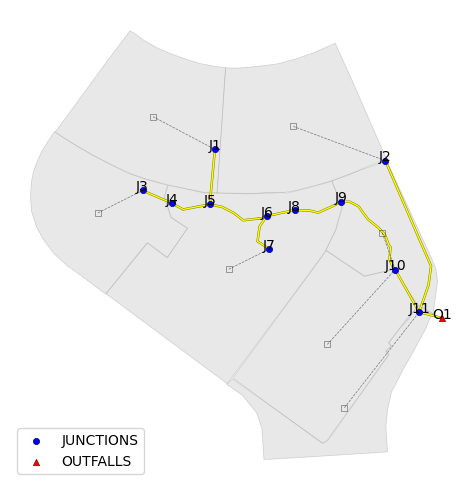

In [16]:
# plot the model
# default

inp = read_inp_file('Example2-Post.inp') 
fig, ax = plot_map(inp)

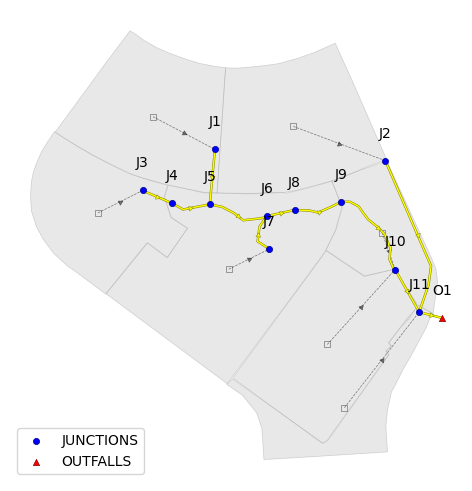

In [17]:
# make it prettier

m = PlottingMap(inp).add_subcatchment_map(add_connector_arrows=True).add_link_map(add_arrows=True).add_node_map().add_node_labels(y_offset=80)
# fig, ax = m.fig, m.ax

Text(0.5, 1.0, "start_node='J1', end_node='J10'")

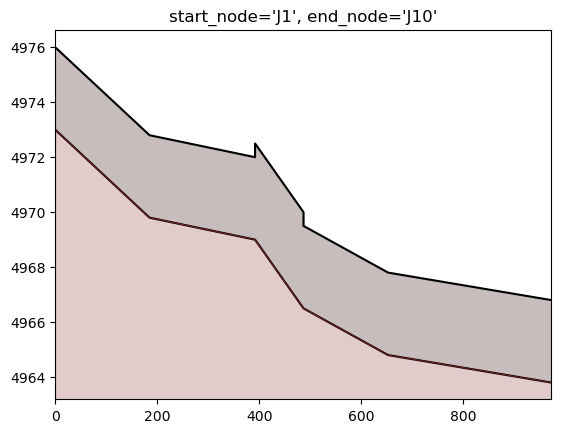

In [18]:
# profile plot

_, ax = plot_longitudinal(inp, start_node='J1', end_node='J10')
ax.set_title("start_node='J1', end_node='J10'")

# 3. Running a simulation and extracting results

import classes

In [19]:
from swmm_api import SwmmInput, SwmmOutput, SwmmReport
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_epa, swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [20]:
inp = read_inp_file('Example2-Post.inp') 

### 3.1. Run the simulation and get the output and status reports

In [21]:
# run simulation

with swmm5_run_temporary(inp.copy(), run = swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 C:\Users\ps28866\AppData\Local\Temp\tmpck7v2gjo\example_run_swmm.inp:   0%|          | 0/100 [00:00<?, ?…

### 3.2 example for reading RPT file

In [22]:
# get available sections

rpt.available_parts

['Simulation Infos',
 'Version+Title',
 'Analysis Options',
 'Runoff Quantity Continuity',
 'Flow Routing Continuity',
 'Highest Flow Instability Indexes',
 'Routing Time Step Summary',
 'Subcatchment Runoff Summary',
 'Node Depth Summary',
 'Node Inflow Summary',
 'Node Flooding Summary',
 'Outfall Loading Summary',
 'Link Flow Summary',
 'Conduit Surcharge Summary']

In [23]:
# print individual parts
# example Runoff Quantity Continuity

rpt.print_raw_part('Runoff Quantity Continuity')

  **************************        Volume         Depth
  Runoff Quantity Continuity     acre-feet        inches
  **************************     ---------       -------
  Total Precipitation ......         8.843         3.669
  Evaporation Loss .........         0.000         0.000
  Infiltration Loss ........         1.470         0.610
  Surface Runoff ...........         7.318         3.036
  Final Storage ............         0.062         0.026
  Continuity Error (%) .....        -0.077


In [24]:
# print Analysis Options

print(rpt._raw_parts['Analysis Options'])

  ****************
  Analysis Options
  ****************
  Flow Units ............... CFS
  Process Models:
    Rainfall/Runoff ........ YES
    RDII ................... NO
    Snowmelt ............... NO
    Groundwater ............ NO
    Flow Routing ........... YES
    Ponding Allowed ........ NO
    Water Quality .......... NO
  Infiltration Method ...... HORTON
  Flow Routing Method ...... KINWAVE
  Starting Date ............ 01/01/2007 00:00:00
  Ending Date .............. 01/01/2007 12:00:00
  Antecedent Dry Days ...... 0.0
  Report Time Step ......... 00:01:00
  Wet Time Step ............ 00:01:00
  Dry Time Step ............ 01:00:00
  Routing Time Step ........ 15.00 sec


In [25]:
# get just the flow units

rpt.analysis_options['Flow Units']

'CFS'

In [26]:
print(rpt.node_flooding_summary)


None


In [27]:
print(rpt.conduit_surcharge_summary)

None


### 3.3 example for reading OUT file


## Available data in the file

In [28]:
out.variables

{'subcatchment': ['rainfall',
  'snow_depth',
  'evaporation',
  'infiltration',
  'runoff',
  'groundwater_outflow',
  'groundwater_elevation',
  'soil_moisture'],
 'node': ['depth',
  'head',
  'volume',
  'lateral_inflow',
  'total_inflow',
  'flooding'],
 'link': ['flow', 'depth', 'velocity', 'volume', 'capacity'],
 'pollutant': [],
 'system': ['air_temperature',
  'rainfall',
  'snow_depth',
  'infiltration',
  'runoff',
  'dry_weather_inflow',
  'groundwater_inflow',
  'RDII_inflow',
  'direct_inflow',
  'lateral_inflow',
  'flooding',
  'outflow',
  'volume',
  'evaporation',
  'PET']}

In [29]:
# get the routing method, design storm
print(inp.RAINGAGES['RainGage'].timeseries)
print(inp.OPTIONS.FLOW_ROUTING)

100-yr
KINWAVE


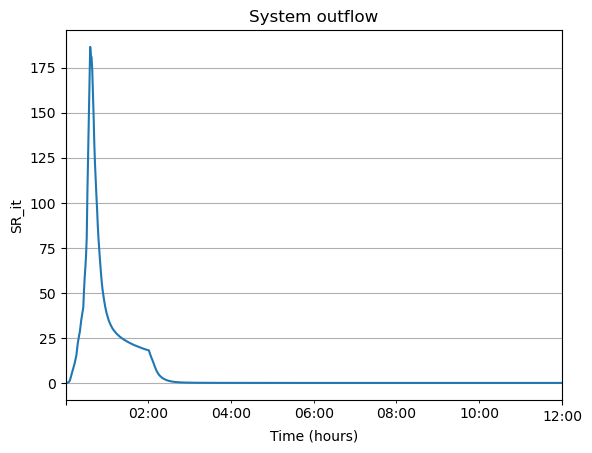

In [34]:
# plot system outflow
# total inflow at O1
import matplotlib.pyplot as plt

out.get_part(OBJECTS.NODE, 'O1', VARIABLES.NODE.TOTAL_INFLOW).plot()
plt.xlabel('Time (hours)')
plt.ylabel('SR_it')
plt.title('System outflow')
plt.grid(True)